### Todos:
### 1. preprocess the data to make it suitable for glove embeding:
### a. remove ' from words( don't -> dont)
### b. convert all letters to lowercase ( Hoping -> hoping)
### 2. find the frequency of each emoji to see if the dataset is balanced and balance the dataset(important)

In [13]:
!pip install chars2vec

    100% |████████████████████████████████| 8.1MB 4.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/46/47/d3/90038cccf02f2536f57163b188356b8f2dd1d3e38b318c5df6
Successfully built chars2vec


In [0]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchtext
import numpy as np
import matplotlib.pyplot as plt
import chars2vec
import sklearn.decomposition

In [0]:
import pandas

In [0]:
def get_data():
    header = ['tweet','label']
    data_set = pandas.read_csv('cleaned_data.txt',delimiter='\t',names = header)
    return data_set

def split_tweet(tweet):
    return tweet.split()    


In [0]:
data_set = get_data()

In [15]:
# This is the global variable for char2vec object
c2v_model = chars2vec.load_model('eng_50')

Instructions for updating:
Colocations handled automatically by placer.


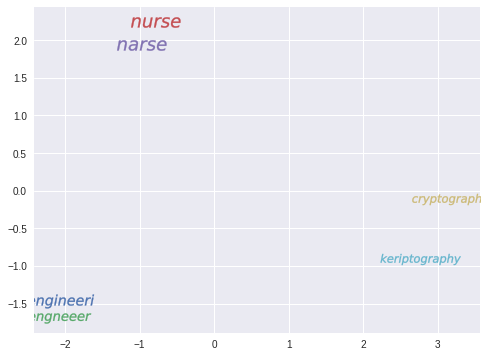

In [19]:
'''
this code block is to visualize the embeddings produced by char2vec for mispelled words
'''

words = ['engineeri', 'engneeer',
        'nurse', 'narse',
        'cryptography', 'keriptography']

# Create word embeddings
word_embeddings = c2v_model.vectorize_words(words)

# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

# Draw words on plane
f = plt.figure(figsize=(8, 6))

for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j)

plt.show()

In [102]:
# ****************DEBUGGING*************************

c2v_model.vectorize_words(['hello', 'how', 'are']).shape

(3, 50)

In [153]:
# ****************DEBUGGING*************************

len(data_set)

161893

In [154]:
data_set

,tweet,label
0,hoping i dont screw up this interview,0
1,i feel like a baby kangaroo stuck in its mothe...,1
2,girl ppl should be happy i even remembered her...,0
3,"oh , the irony if misha wins the choice tv sc...",2
4,"i miss you to , you so fake now",2
5,"i miss you to , you so fake now",4
6,i know,1
7,bacolod please ? !,0
8,things can change so quickly,1
9,all me &amp ; vic do is laugh . . anybody o...,1


In [0]:
def list_of_list_of_data_set(data_set):
  '''
  create a list of list, the inner list containes each splitted tweet.
  '''
  
  tweets_list, encoded_labels = [],[]
  for i in range(len(data_set)):
    tweet = data_set['tweet'][i]
    label = data_set['label'][i]
    if(type(tweet) != str):
        continue
    tweets_list.append(tweet.split())
    encoded_labels.append(label)
  return tweets_list, encoded_labels
  

In [0]:
tweets_list, encoded_labels = list_of_list_of_data_set(data_set)

In [23]:
# ****************DEBUGGING*************************

print(tweets_list[10])
print(len(tweets_list))

['do', 'u', 'have', 'to', 'remind', 'me', 'i', 'was', 'bored', 'right', 'after', 'we', 'graduated']
161893


In [24]:
from collections import Counter
# outlier review stats
tweets_lens = Counter([len(x) for x in tweets_list])
print("Zero-length tweets: {}".format(tweets_lens[0]))
print("Maximum tweet length: {}".format(max(tweets_lens)))

Zero-length tweets: 0
Maximum tweet length: 62


In [155]:
# ****************DEBUGGING*************************

tweets_lens

Counter({1: 3340,
         2: 7871,
         3: 9817,
         4: 11462,
         5: 11761,
         6: 11545,
         7: 10978,
         8: 9911,
         9: 8730,
         10: 8037,
         11: 7391,
         12: 6781,
         13: 5946,
         14: 5389,
         15: 4935,
         16: 4642,
         17: 4190,
         18: 3768,
         19: 3585,
         20: 3189,
         21: 2961,
         22: 2723,
         23: 2384,
         24: 2283,
         25: 2004,
         26: 1690,
         27: 1479,
         28: 1073,
         29: 721,
         30: 523,
         31: 301,
         32: 206,
         33: 120,
         34: 63,
         35: 39,
         36: 25,
         37: 11,
         38: 6,
         39: 4,
         40: 2,
         41: 2,
         42: 1,
         43: 1,
         54: 1,
         62: 2})

In [0]:
def data_set_to_char2vec(tweets_list, seq_length):
  '''left pad tweets if required and driectly generate 
     char2vec embeddings for each tweet. No need to generate the embeddings
     inside the LSTM model
  '''
  
  # create a zeros matrix
  embeddings = np.zeros([len(tweets_list), seq_length, c2v_model.dim])
  
  for i, row in enumerate(tweets_list):
    embeddings[i, -len(row):] = c2v_model.vectorize_words(row)
   
  return embeddings

In [50]:
# ****************DEBUGGING*************************

x = np.zeros([2,10,2])
x[1, -5:].shape

(5, 2)

In [0]:
seq_length = max(tweets_lens)

embeddings = data_set_to_char2vec(tweets_list, seq_length=seq_length)
encoded_labels = np.array(encoded_labels)

In [104]:
# ****************DEBUGGING*************************

print(embeddings[10])
print(len(tweets_list[10]))
print(len(embeddings))

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.92866522 -0.89754045 -0.96674055 ...  0.84702402  0.07180736
   0.14698142]
 [-0.13858666 -0.04155272 -0.84561974 ...  0.93053365  0.05394851
   0.82132113]
 [ 0.71916938 -0.0572949  -0.99729317 ...  0.89942294  0.93165135
   0.19820297]]
13
161893


In [34]:
# ****************DEBUGGING*************************

X = np.arange(10)
X[:17]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Train, Validation, Test Split

In [0]:
from sklearn.utils import shuffle
embeddings, encoded_labels = shuffle(embeddings, encoded_labels)

In [80]:
split_frac = 0.8

## split data into training, validation, and test data (embeddings and labels, x and y)

split_idx = int(len(embeddings)*split_frac)
train_x, remaining_x = embeddings[:split_idx], embeddings[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant embeddings data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(129514, 62, 50) 
Validation set: 	(16189, 62, 50) 
Test set: 		(16190, 62, 50)


In [81]:
# ****************DEBUGGING*************************

type(train_x)

numpy.ndarray

### DataLoader and Batching

In [0]:
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 64

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [125]:
# ****************DEBUGGING*************************

print(len(train_loader))
for tweets, labels in train_loader:
  print(tweets.shape)
  print(labels.shape)
  break
print(tweets[1][61][1].float())
print(type(train_data))

2023
torch.Size([64, 62, 50])
torch.Size([64])
tensor(0.1147)
<class 'torch.utils.data.dataset.TensorDataset'>


### Building the model

In [0]:
class TweetLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TweetLSTM, self).__init__()
#         self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Look up the embedding
#         x = self.emb(x)
        # Set an initial hidden state and cell state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the LSTM
        out, _ = self.rnn(x, (h0, c0))
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out
num_classes = 6
model = TweetLSTM(input_size=50, hidden_size=50, num_classes=num_classes)

In [112]:
# ****************DEBUGGING*************************

output = model(tweets.float())
output.shape

torch.Size([64, 6])

In [117]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for tweets, labels in data_loader:
        output = model(tweets.float())
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return float(correct) / float(total)

get_accuracy(model, test_loader)


0.18936011904761904

In [0]:
def train_rnn_network(model, train, valid, num_epochs=5, learning_rate=1e-5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    counter = 0
    for epoch in range(num_epochs):
        for tweets, labels in train:
            counter += 1
            optimizer.zero_grad()
            pred = model(tweets.float())
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
            if counter % 1000 == 0:
              print("Step %d of Epoch: %d; Loss %f " % ( counter/1000 ,epoch+1,float(loss)))
                
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        print("Final Result for Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
        
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

Step 1 of Epoch: 1; Loss 1.706933 
Step 2 of Epoch: 1; Loss 1.805386 
Final Result for Epoch 1; Loss 1.799720; Train Acc 0.235819; Val Acc 0.240203
Step 3 of Epoch: 2; Loss 1.739516 
Step 4 of Epoch: 2; Loss 1.789616 
Final Result for Epoch 2; Loss 1.708502; Train Acc 0.235982; Val Acc 0.240947
Step 5 of Epoch: 3; Loss 1.706198 
Step 6 of Epoch: 3; Loss 1.764932 
Final Result for Epoch 3; Loss 1.734878; Train Acc 0.237696; Val Acc 0.242870
Step 7 of Epoch: 4; Loss 1.723544 
Step 8 of Epoch: 4; Loss 1.760705 
Final Result for Epoch 4; Loss 1.724967; Train Acc 0.240160; Val Acc 0.244792
Step 9 of Epoch: 5; Loss 1.804523 
Step 10 of Epoch: 5; Loss 1.762070 
Final Result for Epoch 5; Loss 1.838528; Train Acc 0.242199; Val Acc 0.247148
Step 11 of Epoch: 6; Loss 1.804238 
Step 12 of Epoch: 6; Loss 1.712620 
Final Result for Epoch 6; Loss 1.791514; Train Acc 0.245242; Val Acc 0.247024
Step 13 of Epoch: 7; Loss 1.731811 
Step 14 of Epoch: 7; Loss 1.723364 
Final Result for Epoch 7; Loss 1.7047

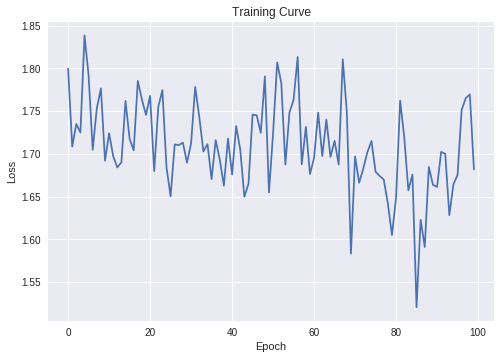

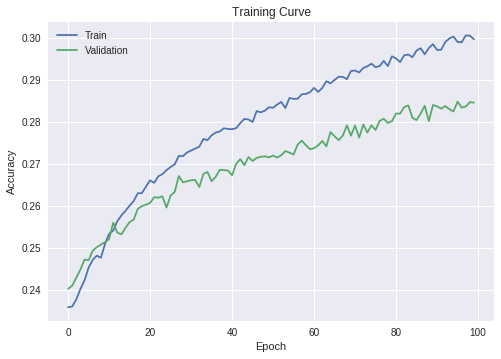

0.28422619047619047

In [121]:
# train the model for 100 epochs

num_classes = 6
model_lstm = TweetLSTM(input_size=50, hidden_size=50, num_classes=num_classes)
train_rnn_network(model_lstm, train_loader, valid_loader, num_epochs=100, learning_rate=5e-5)
get_accuracy(model_lstm, test_loader)

### Saving the model

In [0]:
# torch.save(model_lstm.state_dict(), 'checkpoint.pth')

### Loading the model

In [0]:
state_dict = torch.load('checkpoint.pth')

In [0]:
model_lstm.load_state_dict(state_dict)

### Inference

In [0]:
# Tweet Test
happy_tweet = 'Im happy'
sad_tweet = 'Im sad'
angry = 'Im angry'
surprised_tweet = 'Im surprised'
disgusted_tweet = 'Im disgusted'
afraid_tweet = 'Im afraid'

In [0]:
int_to_emotion = {0:'Happy', 1:'Sad' , 2:'Angry', 3:'Surprised', 4:'Disgusted', 5:'Afraid'}

def predict(model, test_tweet, sequence_length=max(tweets_lens)):
    
    # create a list of list of test_tweet
    tweet = []
    tweet.append(test_tweet.split())
    
    # tweet_embedding -> [1 x seq_len x char2vec.dim], does padding if required
    tweet_embedding = data_set_to_char2vec(tweet, sequence_length) 
    
    # convert to tensor to pass into your model
    embedding_tensor = torch.from_numpy(tweet_embedding)
    
    batch_size = embedding_tensor.size(0)
    
    # get the output from the model
    output = model(embedding_tensor.float())
    
    # convert output probabilities to predicted class (0 or 1)
    output_prob = nn.functional.softmax(output, dim=1)
    top_n_pred = output_prob.topk(3, dim=1) ## top 3 preds
    top_n_pred_prob, top_n_pred_index = top_n_pred[0].detach().numpy()[0], top_n_pred[1].detach().numpy()[0]
    print(test_tweet)
    print('Prediction:')
    for prob,index in zip(top_n_pred_prob,top_n_pred_index):
      print(int_to_emotion[index] , 'with' , str(int(prob*100))+"%", 'confidence')
    print('---------------')

In [128]:
predict(model_lstm, happy_tweet)
predict(model_lstm, sad_tweet)
predict(model_lstm, angry)
predict(model_lstm, surprised_tweet)
predict(model_lstm, disgusted_tweet)
predict(model_lstm, afraid_tweet)

Im happy
Prediction:
Happy with 33% confidence
Sad with 18% confidence
Angry with 15% confidence
---------------
Im sad
Prediction:
Sad with 24% confidence
Happy with 21% confidence
Angry with 17% confidence
---------------
Im angry
Prediction:
Happy with 27% confidence
Angry with 21% confidence
Sad with 18% confidence
---------------
Im surprised
Prediction:
Sad with 24% confidence
Angry with 21% confidence
Disgusted with 16% confidence
---------------
Im disgusted
Prediction:
Sad with 29% confidence
Disgusted with 22% confidence
Angry with 19% confidence
---------------
Im afraid
Prediction:
Sad with 24% confidence
Happy with 23% confidence
Angry with 17% confidence
---------------


In [0]:
tweets = ['How the hellll did youu do thisss ','i cant tell how badddd I feel right nowww',\
          'shutttupp yooo dont mess with me', 'since youu left me, I am sooo depressed']

In [152]:
for tweet in tweets:
  predict(model_lstm, tweet)

How the hellll did youu do thisss 
Prediction:
Happy with 22% confidence
Surprised with 19% confidence
Angry with 17% confidence
---------------
i cant tell how badddd I feel right nowww
Prediction:
Sad with 36% confidence
Disgusted with 23% confidence
Angry with 18% confidence
---------------
shutttupp yooo dont mess with me
Prediction:
Disgusted with 33% confidence
Angry with 23% confidence
Sad with 17% confidence
---------------
since youu left me, I am sooo depressed
Prediction:
Angry with 23% confidence
Happy with 20% confidence
Disgusted with 16% confidence
---------------
